# Mundo 10 - Gráfico de barras

In [1]:
!pip install python-bcb

  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached anyio-4.9.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached httpcore-1.0.7-py3-none-any.whl.metadata (21 kB)
Using cached httpx-0.28.1-py3-none-any.whl (73 kB)
Using cached httpcore-1.0.7-py3-none-any.whl (78 kB)
Using cached anyio-4.9.0-py3-none-any.whl (100 kB)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from bcb import sgs
import matplotlib.ticker as mtick
import matplotlib.dates as mdate
from datetime import datetime
from datetime import timedelta
import yfinance as yf

In [3]:
df_lucros = pd.DataFrame({"Weg": [2000, 3000, 5000, 6000],
                         "Petrobras": [150, 6000, 2000, 10000]}, 
                        index = ['1T', '2T', '3T', '4T'])
                         

df_lucros

,Weg,Petrobras
1T,2000,150
2T,3000,6000
3T,5000,2000
4T,6000,10000


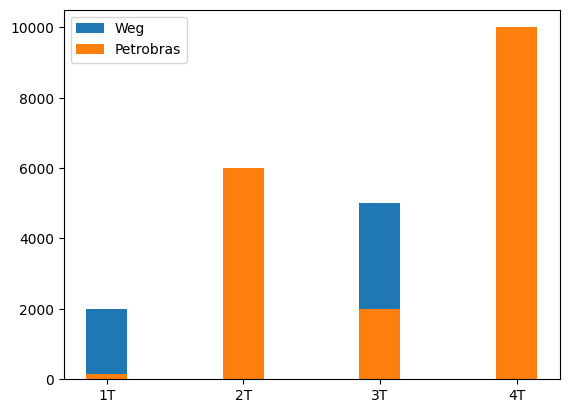

In [9]:
fig, ax = plt.subplots()

ax.bar(df_lucros.index, df_lucros.Weg.values , label = "Weg", width=0.3, align='center')
ax.bar(df_lucros.index, df_lucros.Petrobras.values, label = "Petrobras", width=0.3)
# ax.bar(df_lucros.index, df_lucros.Petrobras.values, label = "Petrobras", width=0.3, 
#        bottom=df_lucros.Weg.values)
ax.legend()



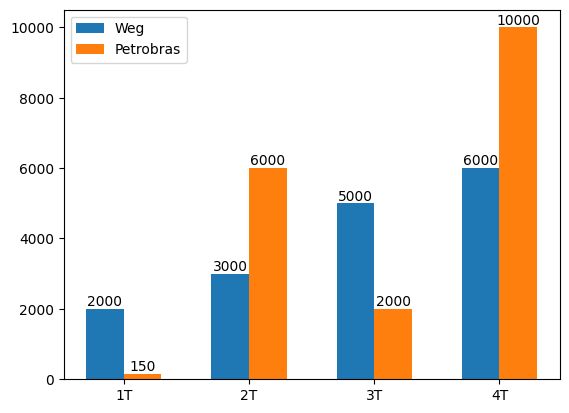

In [5]:
#resolvendo sem stack

fig, ax = plt.subplots()


numero_de_trimestres = 4
posicao_barras = np.arange(numero_de_trimestres)
largura_barras = 0.3

barras = ax.bar(posicao_barras, df_lucros.Weg.values , label = "Weg", width=largura_barras)
barras2 = ax.bar(posicao_barras + largura_barras, df_lucros.Petrobras.values, label = "Petrobras", 
       width=largura_barras)
plt.xticks(posicao_barras + largura_barras / 2, tuple(df_lucros.index))

#adicionando legenda de números

ax.bar_label(barras)#pode formatar com o argumento fmt
ax.bar_label(barras2)

plt.legend()

plt.show()

In [10]:
# Busca a série do IPCA e IGP-M
inflacao = sgs.get({'ipca': 433,
             'igp-m': 189}, start = datetime.now() - timedelta(days = 180))

inflacao

,ipca,igp-m
Date,,
2024-10-01,0.56,1.52
2024-11-01,0.39,1.30
2024-12-01,0.52,0.94
2025-01-01,0.16,0.27
2025-02-01,1.31,1.06
2025-03-01,NaN,-0.34


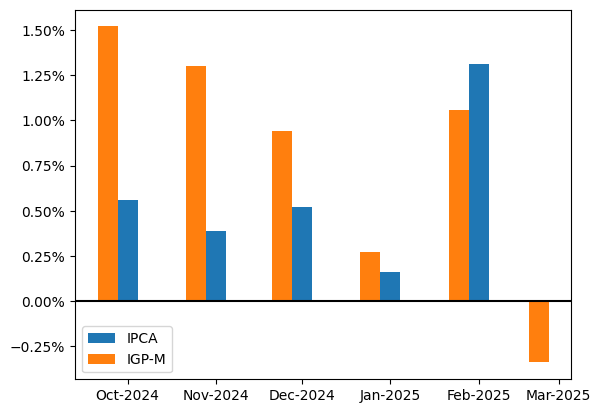

In [11]:
datas_numericas = mdate.date2num(inflacao.index)

fig, ax = plt.subplots()

ax.bar(datas_numericas, inflacao['ipca'], label = "IPCA", width=7)
ax.bar(datas_numericas - 7, inflacao['igp-m'], label = "IGP-M", width=7)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
myFmt = mdate.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis_date()

plt.axhline(y = 0, color = "black")


plt.legend()

plt.show()

# Exercícios 

* Exercício 102: Crie um gráfico de barras com o retorno acumulado da Ambev e do Ibovespa nos últimos 1, 3, 5 e 10 anos utilizando o estilo Cyberpunk.

In [ ]:
import mplcyberpunk
plt.style.use("cyberpunk")

In [12]:
#gabarito 102

cotacoes = yf.download(["^BVSP", "ABEV3.SA"], "2010-01-01")["Close"]

retorno_1_ano = (cotacoes.pct_change(periods = 252).dropna()).iloc[-1, :]
retorno_3_anos = (cotacoes.pct_change(periods = 252 * 3).dropna()).iloc[-1, :]
retorno_5_anos = (cotacoes.pct_change(periods = 252 * 5).dropna()).iloc[-1, :]
retorno_10_anos = (cotacoes.pct_change(periods = 252 * 10).dropna()).iloc[-1, :]

valores_ibov = np.array([retorno_1_ano.iloc[0], retorno_3_anos.iloc[0], retorno_5_anos.iloc[0], retorno_10_anos.iloc[0]]) * 100
valores_abev = np.array([retorno_1_ano.iloc[1], retorno_3_anos.iloc[1], retorno_5_anos.iloc[1], retorno_10_anos.iloc[1]]) * 100



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed
C:\Users\João Felipe\AppData\Local\Temp\ipykernel_16016\1172817721.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retorno_1_ano = (cotacoes.pct_change(periods = 252).dropna()).iloc[-1, :]
C:\Users\João Felipe\AppData\Local\Temp\ipykernel_16016\1172817721.py:6: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retorno_3_anos = (cotacoes.pct_change(periods = 252 * 3).dropna()).iloc[-1, :]
C:\Users\João Felipe\AppData\Local\Temp\ipykernel_16016\1172817721.py:7: FutureWarning: The default fill_method='pad' in DataFrame.pct_c

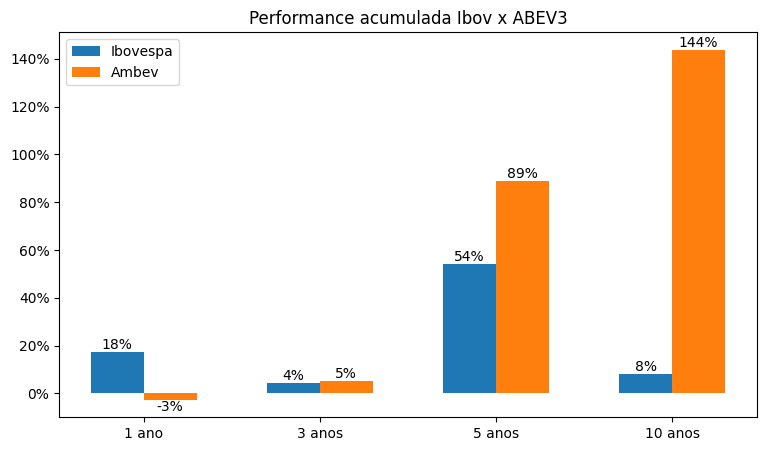

In [13]:
fig, ax = plt.subplots(figsize = (9, 5))


numero_de_anos = 4
posicao_barras = np.arange(numero_de_anos)
largura_barras = 0.3

barras = ax.bar(posicao_barras, valores_ibov , label = "Ibovespa", width=largura_barras)
barras2 = ax.bar(posicao_barras + largura_barras, valores_abev, label = "Ambev", width=largura_barras)
plt.xticks(posicao_barras + largura_barras / 2, ("1 ano", "3 anos", "5 anos", "10 anos"))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

#adicionando legenda de números

ax.bar_label(barras, fmt = "%.0f%%")
ax.bar_label(barras2, fmt = "%.0f%%")

plt.legend()
plt.title("Performance acumulada Ibov x ABEV3")

plt.show()

# Mundo 11

Histogramas, dispersão e muito mais.